# P_1_FI - Field Isolation 

Starter Pipeline with field masking 

## Imports 

In [86]:
import torch
import numpy as np
import PIL
from tqdm import tqdm
from PIL import Image
import pytorch_lightning as pl
import segmentation_models_pytorch as smp
from matplotlib import pyplot as plt
import sys  
import os
from pathlib import Path
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np

# Set Root Directory
root = Path('/mnt/c/Users/Samarth Negi/Desktop/soccerEye')
sys.path.insert(0, str(root))


from IPython.display import Video
import cv2
import methods 
import utils


In [87]:
# Set Dataset Path
dataset = Path('../dataset/df-bl/')
dataset = dataset.resolve()
print(f'Dataset Location : {dataset}')
dataset_files = utils.util_searching_all_files(dataset)
print(f'Number of files in dataset : {len(dataset_files)}')

Dataset Location : /mnt/c/Users/Samarth Negi/Desktop/soccerEye/dataset/df-bl
Number of files in dataset : 12


In [88]:
CHECKPOINT_LOCATION = '../weights/FPN_FieldMask_1/checkpoints/epoch=49-step=600.ckpt'

## One Frame Test

In [101]:
videoPick = np.random.randint(len(dataset_files))
print(f'Video Picked (index) : {videoPick}')
cap = cv2.VideoCapture(str(dataset_files[videoPick]))

Video Picked (index) : 11


In [102]:
total_frames = cap.get(7)
print(total_frames)

cap.set(1, np.random.randint(total_frames))


85500.0


True

In [103]:
ret, frame = cap.read()

In [104]:
frame_w = frame.shape[1]
frame_h = frame.shape[0]

In [105]:
# Getting field mask 
frame_fm = methods.P_IF_4_FPN_CV2(frame,CHECKPOINT_LOCATION,inputType = 'single',device='cpu')

# Resize
frame_fm_sized = cv2.resize(frame_fm, (frame_w,frame_h), interpolation = cv2.INTER_LINEAR )
frame_fm_sized_binary = cv2.normalize(frame_fm_sized, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)

# Create Field Isolate
field_isolate = cv2.bitwise_and(frame,frame,mask = frame_fm_sized_binary)


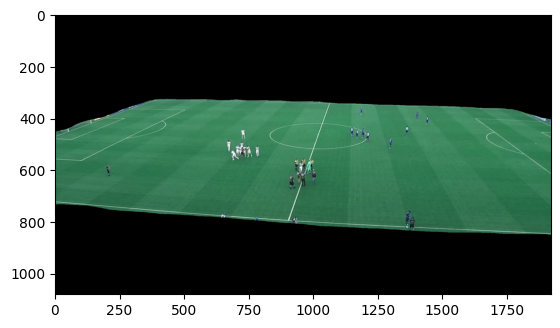

In [106]:
imshow(field_isolate)

## Video Application Example 

In [ ]:
w = frame_w * 2 
h = frame_h


out = cv2.VideoWriter('../outputs/P_1_FI.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (w,h))

for frame_index in tqdm(range(10000,20000)):
    cap.set(1, frame_index)
    ret, frame = cap.read()
    frame_w = frame.shape[1]
    frame_h = frame.shape[0]
    # Getting field mask 
    frame_fm = methods.P_IF_4_FPN_CV2(frame,CHECKPOINT_LOCATION,inputType = 'single',device='cpu')

    # Resize
    frame_fm_sized = cv2.resize(frame_fm, (frame_w,frame_h), interpolation = cv2.INTER_LINEAR )
    frame_fm_sized_binary = cv2.normalize(frame_fm_sized, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)

    # Create Field Isolate
    field_isolate = cv2.bitwise_and(frame,frame,mask = frame_fm_sized_binary)

    merge = np.concatenate((frame,field_isolate),axis=1)
    
    out.write(merge)
    

out.release
    

  1%|▉                                                                            | 117/10000 [03:02<4:17:34,  1.56s/it]

In [119]:
merge.shape

(1080, 3840, 3)

In [120]:
from IPython.display import Video